## Data Visualization

### Tweets Data Set

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
conn = sqlite3.connect('capstone2.db', timeout=10)

In [41]:
tweets_df = pd.read_sql_query('SELECT * FROM tweets_df;', parse_dates = ['created_at'], con = conn)
netflix_tweets = pd.read_sql_query('SELECT * from tweets_df WHERE company = "NFLX";', parse_dates = ['created_at'], con = conn)
amazon_tweets = pd.read_sql_query('SELECT * from tweets_df WHERE company = "AMZN";', parse_dates = ['created_at'], con = conn)
disney_tweets = pd.read_sql_query('SELECT * from tweets_df WHERE company = "DIS";', parse_dates = ['created_at'], con = conn)
google_tweets = pd.read_sql_query('SELECT * from tweets_df WHERE company = "GOOGL";', parse_dates = ['created_at'], con = conn)
conn.close()

In [18]:
tables = [netflix_tweets, disney_tweets, amazon_tweets, google_tweets]
name = ['NFLX', 'DIS', 'AMZN', 'GOOGL']
i = 0
for table in tables:
    print(name[i])
    print(table.describe())
    i+=1

NFLX
       follower_count      neg_sent      neu_sent      pos_sent  compound_sent
count    6.405500e+04  64055.000000  64055.000000  64055.000000   64055.000000
mean     1.065048e+04      0.056622      0.806854      0.136505       0.179516
std      4.770410e+05      0.105180      0.178109      0.160311       0.438237
min      0.000000e+00      0.000000      0.000000      0.000000      -0.985500
25%      7.900000e+01      0.000000      0.682000      0.000000       0.000000
50%      2.650000e+02      0.000000      0.823000      0.096000       0.000000
75%      7.750000e+02      0.094000      1.000000      0.235000       0.557400
max      7.781631e+07      1.000000      1.000000      1.000000       0.990800
DIS
       follower_count      neg_sent      neu_sent      pos_sent  compound_sent
count    7.840400e+04  78404.000000  78404.000000  78404.000000   78404.000000
mean     8.773094e+03      0.053819      0.799222      0.146743       0.212293
std      3.438629e+05      0.107916      0.

In [42]:
from datetime import datetime
tables = [netflix_tweets, amazon_tweets, disney_tweets, google_tweets]
for table in tables:
    table.created_at = table.created_at.apply(lambda x: x.date())

In [5]:
sentiment = pd.DataFrame({'NFLX': netflix_tweets.groupby('sentiment').count()['created_at'],
                          'DIS': disney_tweets.groupby('sentiment').count()['created_at'],
                          'AMZN': amazon_tweets.groupby('sentiment').count()['created_at'],
                          'GOOGL': google_tweets.groupby('sentiment').count()['created_at']})

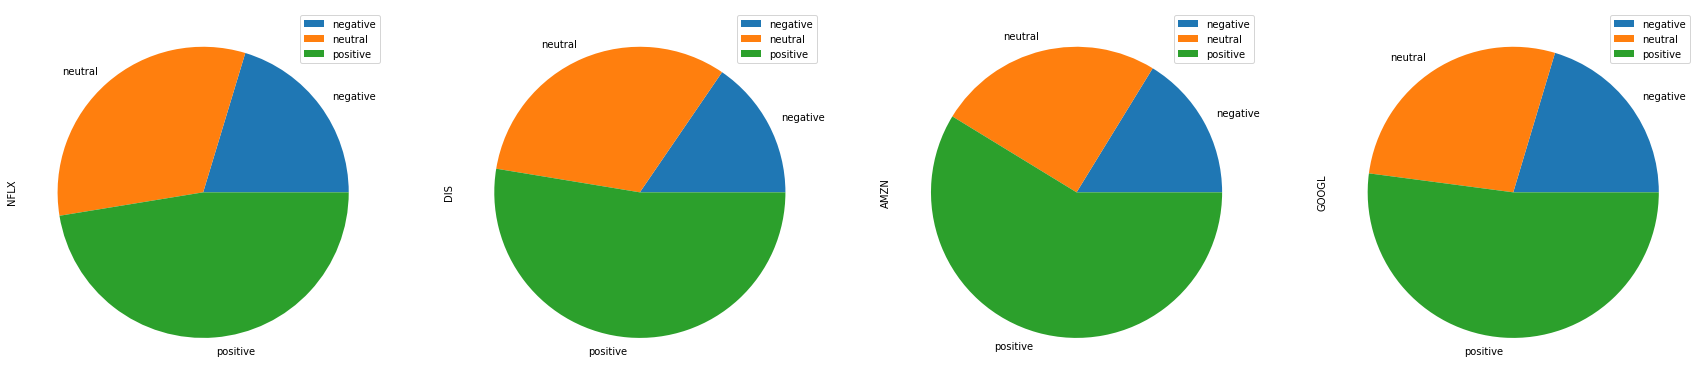

In [8]:
sentiment.plot(kind='pie', subplots=True, figsize=(30,15))
plt.legend(loc= 'upper right')
plt.show()

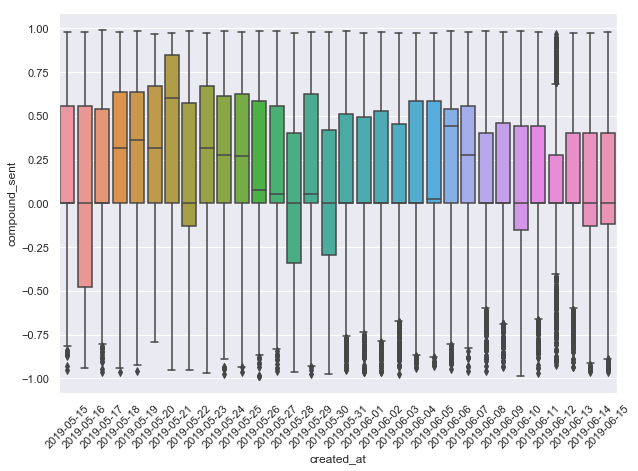

In [31]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x='created_at', y='compound_sent', data=netflix_tweets, )
plt.xticks(rotation = 45)
plt.show()

**Compound Sentiment Unweighted Average**

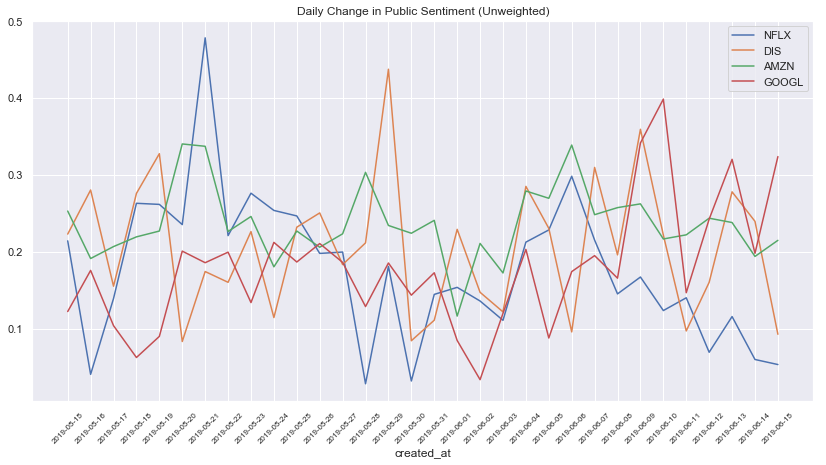

In [34]:
compound_sent = pd.DataFrame({'NFLX': netflix_tweets.groupby('created_at').mean()['compound_sent'],
                         'DIS': disney_tweets.groupby('created_at').mean()['compound_sent'],
                         'AMZN': amazon_tweets.groupby('created_at').mean()['compound_sent'],
                         'GOOGL': google_tweets.groupby('created_at').mean()['compound_sent']})

compound_sent.plot(grid = True, figsize=(14,7), title = 'Daily Change in Public Sentiment (Unweighted)')
plt.xticks(compound_sent.index, fontsize=8, rotation = 45)
plt.legend(loc='upper right')
plt.show()

**Compound Sentiment Weighted Average by Follower Count**

The more followers you have, the more influential your tweet is. To get a more accurate daily average sentiment value, I weighted the average by follower count.

In [32]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

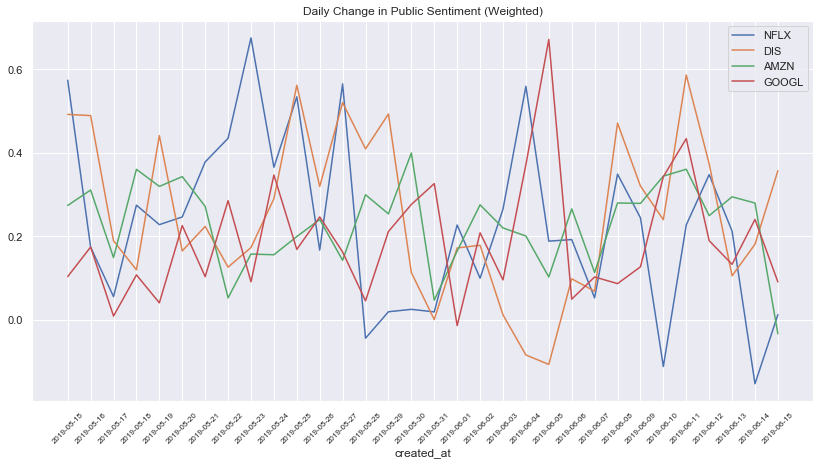

In [33]:
w_compound_sent = pd.DataFrame({'NFLX': netflix_tweets.groupby('created_at').apply(wavg, "compound_sent", "follower_count"),
                         'DIS': disney_tweets.groupby('created_at').apply(wavg, "compound_sent", "follower_count"),
                         'AMZN': amazon_tweets.groupby('created_at').apply(wavg, "compound_sent", "follower_count"),
                         'GOOGL': google_tweets.groupby('created_at').apply(wavg, "compound_sent", "follower_count")})

w_compound_sent.plot(grid = True, figsize=(14,7), title = 'Daily Change in Public Sentiment (Weighted)')
plt.xticks(compound_sent.index, fontsize=8, rotation = 45)
plt.legend(loc='upper right')
plt.show()

### Stocks Data Set

In [49]:
stocks_df = pd.read_sql_query('SELECT * FROM stocks_df;', parse_dates = ['date'], con = conn)
netflix_stocks = pd.read_sql_query('SELECT * from stocks_df WHERE company = "NFLX";', parse_dates = ['date'], con = conn)
amazon_stocks = pd.read_sql_query('SELECT * from stocks_df WHERE company = "AMZN";', parse_dates = ['date'], con = conn)
disney_stocks = pd.read_sql_query('SELECT * from stocks_df WHERE company = "DIS";', parse_dates = ['date'], con = conn)
google_stocks = pd.read_sql_query('SELECT * from stocks_df WHERE company = "GOOGL";', parse_dates = ['date'], con = conn)
conn.close()

In [ ]:
from datetime import datetime
tables = [netflix_stocks, amazon_stocks, disney_stocks, google_stocks]
for table in tables:
    table.date = table.date.apply(lambda x: x.date())
    table.set_index('date', inplace=True)

In [102]:
google_stocks.head()

,open,high,low,close,volume,Company
date,,,,,,
2019-05-15,1122.55,1178.300000,1121.40,1170.80,2.965117e+06,GOOGL
2019-05-16,1171.84,1194.160000,1168.45,1184.50,1.765388e+06,GOOGL
2019-05-17,1175.83,1186.290000,1166.42,1168.78,1.268050e+06,GOOGL
2019-05-18,1168.22,1175.193333,1156.99,1160.74,1.355409e+06,GOOGL
2019-05-19,1160.61,1164.096667,1147.56,1152.70,1.442767e+06,GOOGL


In [67]:
stocks = pd.DataFrame({'NFLX': netflix_stocks['open'],
                  'DIS': disney_stocks['open'],
                  'AMZN': amazon_stocks['open'],
                  'GOOGL': google_stocks['open']})

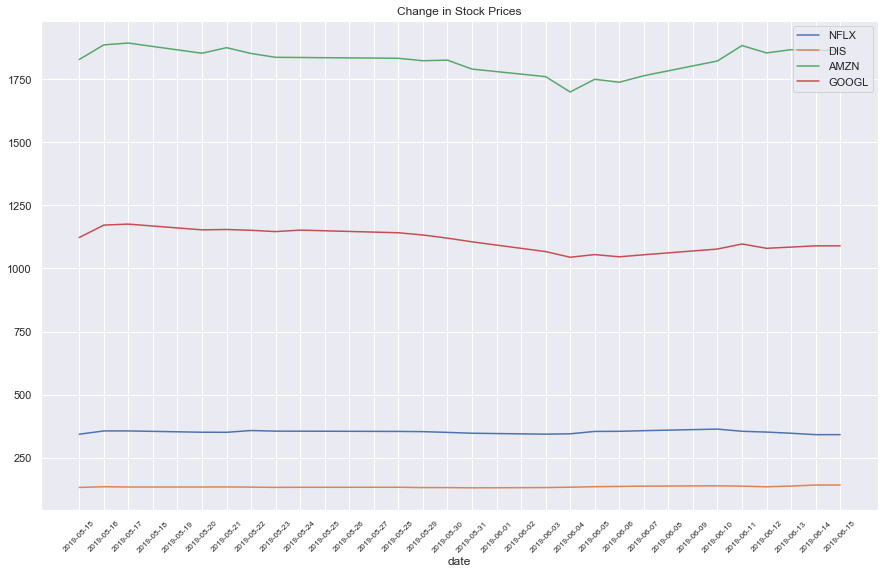

In [69]:
stocks.plot(grid = True, figsize=(15,9), title = 'Change in Stock Prices')
plt.xticks(stocks.index, fontsize=8, rotation = 45)
plt.legend(loc='upper right')
plt.show()

In [81]:
from bokeh.plotting import figure, show, output_file
import numpy as np

google_stocks.reset_index(inplace=True)

df = google_stocks
inc = df.close > df.open
dec = df.open > df.close
w = 12*60*60*1000 # half day in ms
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
title = 'GOOGL' + ' Chart'
p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = title)
p.xaxis.major_label_orientation = np.pi/4
p.grid.grid_line_alpha=0.3
p.segment(df.date, df.high, df.date, df.low, color="black")
p.vbar(df.date[inc], w, df.open[inc], df.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.date[dec], w, df.open[dec], df.close[dec], fill_color="#F2583E", line_color="black")
#Store as a HTML file
output_file("stock_information.html", title="candlestick.py example")
# Display in browser
show(p)

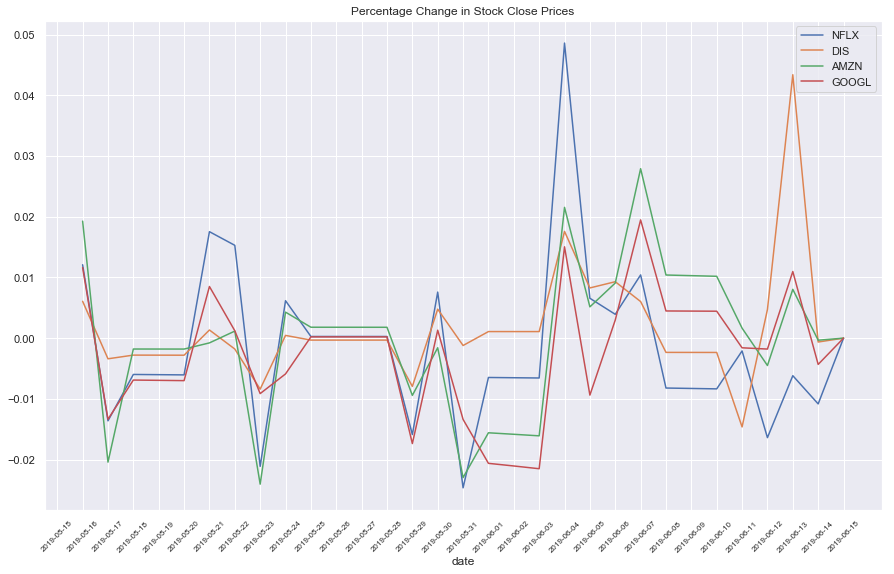

In [103]:
stocks_close = pd.DataFrame({'NFLX': netflix_stocks['close'],
                  'DIS': disney_stocks['close'],
                  'AMZN': amazon_stocks['close'],
                  'GOOGL': google_stocks['close']})
stock_change = stocks_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.plot(grid = True, figsize=(15,9), title = 'Percentage Change in Stock Close Prices')
plt.xticks(stock_change.index, fontsize=8, rotation = 45)
plt.legend(loc='upper right')
plt.show()

## Time Series Analysis

**Time Series Decomposition**
Time series may be split into: Base Level, Trend, Seasonality, Error

Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

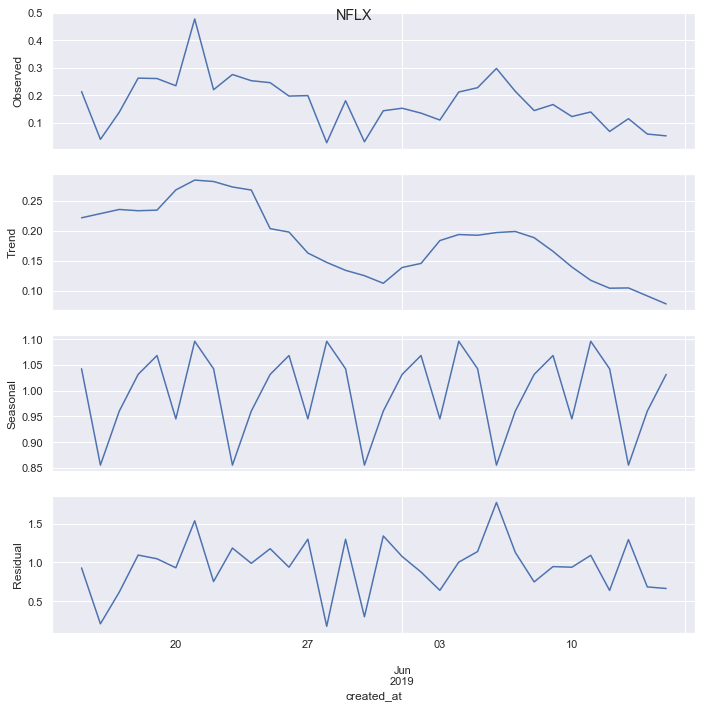

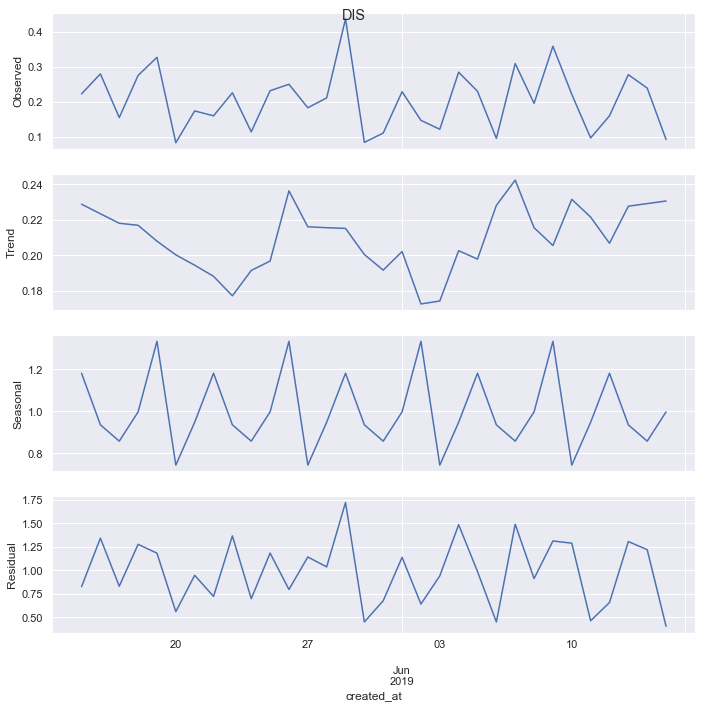

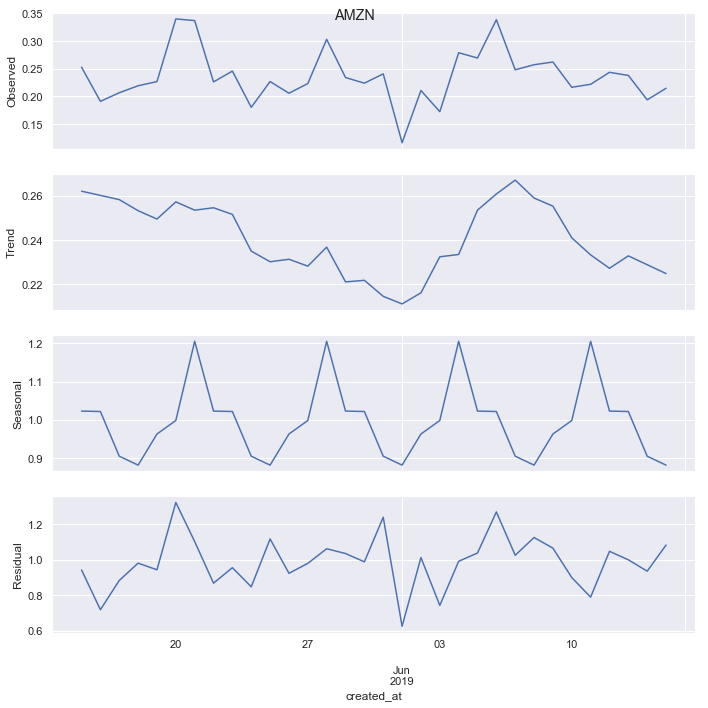

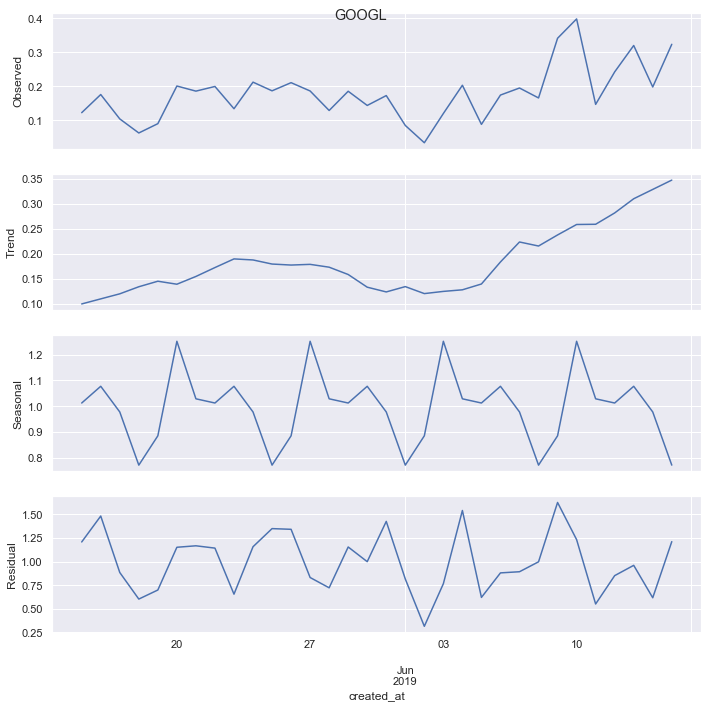

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

tables = ['NFLX', 'DIS', 'AMZN', 'GOOGL']
for t in tables:
    df = compound_sent[t].to_frame()
    df.reset_index(inplace=True)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.set_index('created_at')
    
    result_mul = seasonal_decompose(df[t], model='multiplicative', extrapolate_trend='freq')
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_mul.plot().suptitle(t)
plt.show()

In [97]:
import scipy.stats as ss
close = netflix_stocks.close.values
len(np.diff(close))

31

**Granger Causality**

In [165]:
import numpy as np
import pandas as pd
import scipy.stats as ss

def create_combined_vector(tweet, stock, name):      
    
    # Seperate out vectors
    days  = [0 for i in range(len(tweet.values))]
    sent = tweet[name].values
    close = stock[name].values

    # Resize and normalize                                                                                
    days  = days[1:]
    sent = ss.zscore(sent[1:])
    close = ss.zscore(close[1:])

    return (sent, close, days)

def show_comparison_graph(d1, v1, v2,
                          v1_label='v1_line',
                          v2_label='v2_line',
                          title=""):
    """
    Plot two vectors for comparison against one another
    This will pause the application until you close the plot
    """
    plt.plot(d1, v1, 'b-', label=v1_label)                           
    plt.plot(d1, v2, 'r-', label=v2_label)
    plt.title(title)
    plt.legend(loc='upper left')                                                      
    plt.show()  

In [121]:
int(32 * 0.2)

6

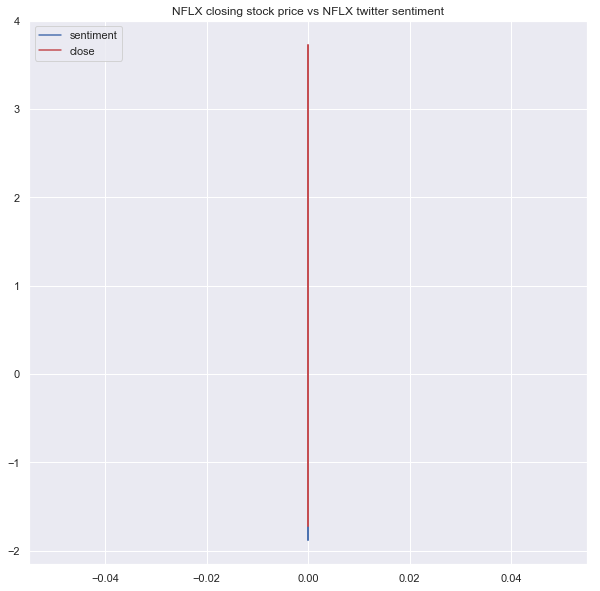

Did not find instances of 'causation' for NFLX closing stock price and NFLX twitter sentiment


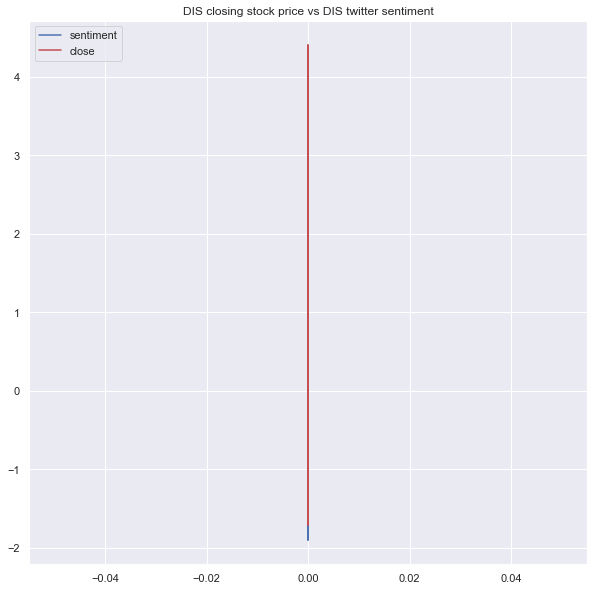

Did not find instances of 'causation' for DIS closing stock price and DIS twitter sentiment


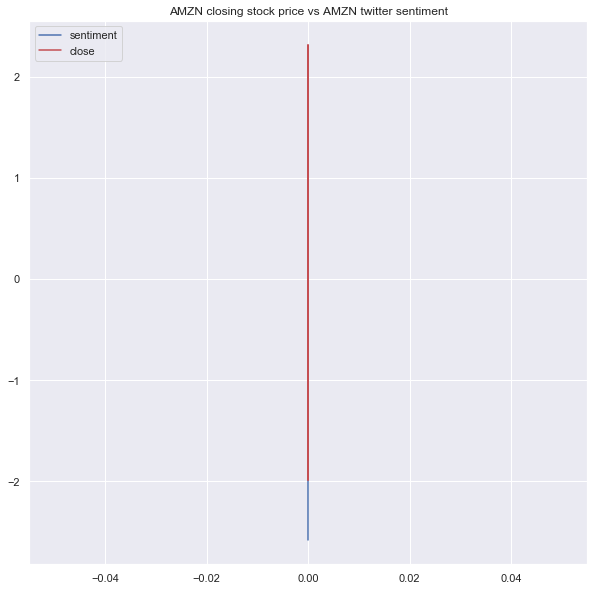

Did not find instances of 'causation' for AMZN closing stock price and AMZN twitter sentiment


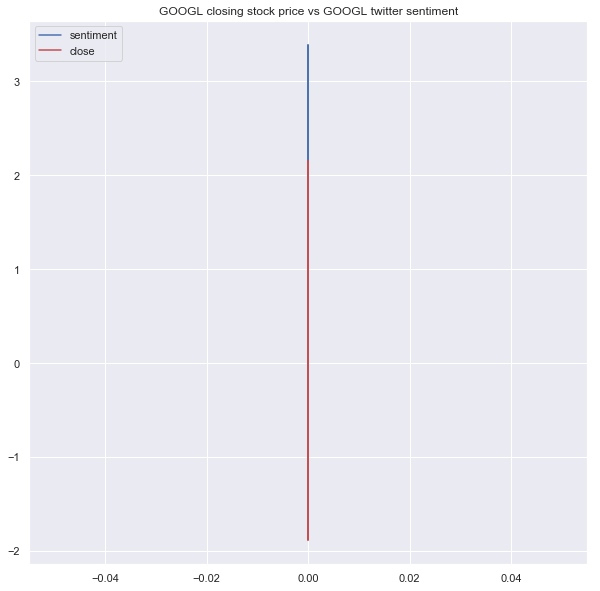

Successfully found instances of 'causation' for GOOGL closing stock price and GOOGL twitter sentiment


In [170]:
stocks_data = [netflix_stocks, disney_stocks, amazon_stocks, google_stocks]
company = ['NFLX', 'DIS', 'AMZN','GOOGL']

fmt_output = []

no_causality  = []
yes_causality = []

strong_p_value = 0.05
super_strong_p_value = 0.001

total_lag = [] # p-value less than strong_p_value
best_lag  = [] # p-value less than super_strong_p_value 

num = 0
for stock in stocks_data:

    (sent, close, days) = create_combined_vector(w_compound_sent, stock_change, company[num])
    
    asset_search = company[num] + ' closing stock price'
    trend_search = company[num] + ' twitter sentiment'
    num += 1
    combined_vector = []
    for i in range(len(sent)):
        combined_vector.append((sent[i], close[i]))

    maxlag = int(len(combined_vector) * 0.2)
    try:
        gc = stattools.grangercausalitytests(combined_vector,
                                             maxlag,
                                             addconst=True ,
                                             verbose=False)
    except Exception as e:
        print(e)
        gc = []

    lag_pvalue = {}
    lag_numbers = []
    for lag in gc:
        
        fp = (lag, gc[lag][0]['ssr_ftest'][0], gc[lag][0]['ssr_ftest'][1])        

        if gc[lag][0]['ssr_ftest'][1] < strong_p_value and lag > 1:
            lag_numbers.append(lag)
            total_lag.append(lag)
            if gc[lag][0]['ssr_ftest'][1] < super_strong_p_value:
                best_lag.append(lag)
    show_comparison_graph(days, sent, close,
                          v1_label="sentiment",
                          v2_label="close",
                          title = asset_search + " vs " + trend_search)
    if len(lag_numbers):
        yes_causality.append((asset_search, trend_search, len(combined_vector)))
        print("Successfully found instances of 'causation' for %s and %s" %
              (asset_search, trend_search))
    else:
        no_causality.append((asset_search, trend_search, len(combined_vector)))
        print("Did not find instances of 'causation' for %s and %s" %
              (asset_search, trend_search))

    for lag in lag_numbers:

        try:
            corr = np.corrcoef(sent[lag:], close[:-lag])[0][1]
            fmt_output.append((asset_search, trend_search,
                               lag, gc[lag][0]['params_ftest'][1], corr))
        except Exception as e:
            print(e)
            print(lag)

In [169]:
from collections import OrderedDict 
count = 0

print("\n===========================================================\n")

print("No Causality\n")
for row in no_causality:
    print("%s and %s showed NO causality, count: %d" % row)
    count += 1
print("\n-------------------------------------------------------\n")
print("Causality\n")
for row in yes_causality:
    print("%s and %s showed causality, count: %d" % row)
    count += 1

print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("Causality Count: %d" % (len(yes_causality)))
print("No Causality Count: %d\n" % (len(no_causality)))

np_total_lag = np.array(total_lag)

print('std', np.std(np_total_lag))
print('avg', np.average(np_total_lag))

if count == 0:
    count = 99999999999999

print("Percent showing causality: %3.2f\n" %
      (float(len(yes_causality)) / float(count)))

lag_dict = {x:total_lag.count(x) for x in total_lag}
lag = OrderedDict(sorted(lag_dict.items()))

best_lag_dict = {x:best_lag.count(x) for x in best_lag}
best_lag = OrderedDict(sorted(best_lag_dict.items()))



No Causality

NFLX closing stock price and NFLX twitter sentiment showed NO causality, count: 31
DIS closing stock price and DIS twitter sentiment showed NO causality, count: 31
AMZN closing stock price and AMZN twitter sentiment showed NO causality, count: 31

-------------------------------------------------------

Causality

GOOGL closing stock price and GOOGL twitter sentiment showed causality, count: 31

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Causality Count: 1
No Causality Count: 3

std 1.479019945774904
avg 3.75
Percent showing causality: 0.25



Correlation: 4
Strong Correlation: 0


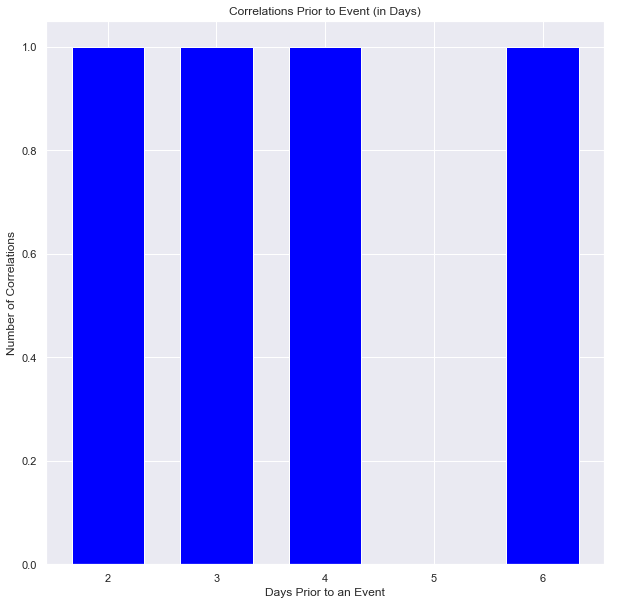

In [161]:
y = []
x = []

for i in lag:
    x.append(i)
    y.append(lag[i])
    
x_best = []
y_best = []
for i in best_lag:
    x_best.append(i)
    y_best.append(best_lag[i])

print("Correlation: %d" % np.sum(y))
print("Strong Correlation: %d" % np.sum(y_best))

"""
Generate graph
"""
width = 1/1.5
plt.bar(x, y, width, color="blue", label="Correlation")
plt.bar(x_best, y_best, width, color="red", label="Strong Correlation")
plt.title("Correlations Prior to Event (in Days)")
plt.xlabel("Days Prior to an Event")
plt.ylabel("Number of Correlations")
#plt.legend(loc='upper right')
plt.show()